As a first step, we need to retrieve geographic locations (Lat/Lon) from the property's address. For this step, Geoapify API is used. Note: Do not try running this as it takes 7 hours to finish. It has been already run once 

In [1]:

# import pandas as pd
# import requests
# import json

In [2]:
# first_2019 = pd.read_csv("Resources/1st_half_2019.csv")
# second_2019 = pd.read_csv("Resources/2nd_half_2019.csv")
# first_2020 = pd.read_csv("Resources/1st_half_2020.csv")
# second_2020 = pd.read_csv("Resources/2nd_half_2020.csv")
# first_2021 = pd.read_csv("Resources/1st_half_2021.csv")
# second_2021 = pd.read_csv("Resources/2nd_half_2021.csv")
# first_2022 = pd.read_csv("Resources/1st_half_2022.csv")
# second_2022 = pd.read_csv("Resources/2nd_half_2022.csv")
# first_2023 = pd.read_csv("Resources/1st_half_2023.csv")

# Concatenate Each Year csv Files Together as Follows:

In [3]:
# list_2019 = [first_2019, second_2019] 
# #Concatenate all the dataframes 
# list_2019_df = pd.concat(list_2019)

In [4]:
# list_2020 = [first_2020, second_2020]
# #Concatenate all the dataframes 
# list_2020_df = pd.concat(list_2020)

In [5]:
# list_2021 = [first_2021, second_2021]
# list_2021_df = pd.concat(list_2021)

In [6]:
# list_2022_2023 = [first_2022, second_2022,first_2023]
# list_2022__2023_df = pd.concat(list_2022_2023)

In [7]:
# #Take the address column out from each table and create a dataframe
# updated_address_2019 = list(list_2019_df['Address'].values)
# updated_address_2019_df = pd.DataFrame(updated_address_2019, columns = ['address'])

# Obtain an API key from the Geoapify website and set the API call as follows

In [8]:
# # Define the API parameters
# params = {
#     "apiKey":'508af4b6c8244d419aa1ee2b15088f19',
#     "format":"json"
# }

# # Set the base URL
# base_url = "https://api.geoapify.com/v1/geocode/search"

In [9]:
# # Loop through the addresses DataFrame and search coordinates for each address
# #Note to run each dataframe of addresses, replace address_2019_df with, address_2020_df,or address_2021_df, or address_2019_df 


# for index, row in address_2019_df.iterrows():

# #     Get the address & add ", state, VA and country USA" to the string so geoapify finds the correct address
#     complete_address = row["address"] +",VA" +", USA"

# #     Add the current address to the parameters
#     params["text"] = f"{address}"

#     # Make the API request
#     response = requests.get(base_url, params=params)
    
#     # Convert reponse to JSON
#     response = response.json()

# #     # Extract latitude and longitude
#     updated_address_2019_df.loc[index, "Lat"] = response["results"][0]["lat"]
#     updated_address_2019_df.loc[index, "Lon"] = response["results"][0]["lon"]
    
# #     # Log the search results
#     print(f"Coordinates for {address} fetched...")

In [10]:
# # Display the address and it corresponding lat and lon values:
# updated_address_2019_df

# Importing Required Libraries/Dependencies
start running the code starting from here

In [11]:
# Steps to create a machine learning model for predicting the sale price of a 
# house in Fairfax county, Virginia

# 1. Import all the required libraries or dependencies
# 2. Import the Fairfax County 2019-2023 house sale csv data
# 3. Convert the physical addresses to Lat/Lon coordinates using geoapify API
# 4. Exploratory Data Analysis (EDA)
# 5. Data Visualization the dependent variable (Sold Price) vs other independent variables
# 6. Create machine learning model
# 7. Evaluate the machine learning model using evaluation metrics


In [12]:
# Import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from termcolor import colored as cl

In [13]:
#Read each csv files and create pandas dataframe
combined_data_df =pd.read_csv("Resources/combined_data.csv")
updated_address_2019_df = pd.read_csv("Resources/updated_address_2019.csv")
updated_address_2020_df = pd.read_csv("Resources/updated_address_2020.csv")
updated_address_2021_df = pd.read_csv("Resources/updated_address_2021.csv")
updated_address_2022_20223 = pd.read_csv("Resources/updated_address_2022_20223.csv")

In [14]:
# Display the shape of the combined dataframe
combined_data_df.shape

(30984, 17)

In [15]:
combined_data_df.head(2)

,MLS #,Cat,Status,Address,City,DOM,Subdivision/Neighborhood,County,Year Built,Beds,Baths,Current Price,DOM/CDOM,RATIO Current Price By SQFT,Structure Type,Status Contractual Search Date,Above Grade Finished SQFT
0,VAFX1157578,RES,CLS,1055 Marmion Dr,Herndon,0,SUMMERHOUSE LANDING,"Fairfax, VA",2019.0,4,1-Apr,"$1,252,430",0 / 0,281.44,Detached,4/25/2019,"4,450"
1,VAFX1150576,RES,CLS,9305 Schubert Ct,Vienna,0,SHOUSE VILLAGE,"Fairfax, VA",1969.0,4,1-Mar,"$950,000",0 / 0,416.3,Detached,5/22/2019,"2,282"


In [16]:
# Concat all the address tables with the Lat/Lon data to the original data
address_df = pd.concat([updated_address_2019_df,updated_address_2020_df, updated_address_2021_df, 
                        updated_address_2022_20223])

In [17]:
# Preview the address dataframe with the corresponding Lat/Lon data
address_df.head(2)

,Address,Lat,Lon
0,1055 Marmion Dr,38.890769,-77.348283
1,9305 Schubert Ct,38.945249,-77.265944


In [18]:
#Concatenate the address and the original data
Merged_df = combined_data_df.merge(address_df, on = 'Address', how = 'outer')

In [19]:
Merged_df.shape

(34192, 19)

# Exploratory Data Analysis (EDA)

In [20]:
#Remove duplicate rows
Merged_df = Merged_df.drop_duplicates()
Merged_df.shape

(30984, 19)

In [21]:
# Preview the merged or combined dataframe
Merged_df.head(1)

,MLS #,Cat,Status,Address,City,DOM,Subdivision/Neighborhood,County,Year Built,Beds,Baths,Current Price,DOM/CDOM,RATIO Current Price By SQFT,Structure Type,Status Contractual Search Date,Above Grade Finished SQFT,Lat,Lon
0,VAFX1157578,RES,CLS,1055 Marmion Dr,Herndon,0,SUMMERHOUSE LANDING,"Fairfax, VA",2019.0,4,1-Apr,"$1,252,430",0 / 0,281.44,Detached,4/25/2019,"4,450",38.890769,-77.348283


Split the year and the month from Status Contractual Search Date column

In [22]:
# convert the object datatype to datatime
Merged_df['Status Contractual Search Date'] = \
pd.to_datetime(Merged_df['Status Contractual Search Date'])
Merged_df['Status Contractual Search Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 30984 entries, 0 to 34191
Series name: Status Contractual Search Date
Non-Null Count  Dtype         
--------------  -----         
30984 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 484.1 KB


In [23]:
# Split the year 
Merged_df['year'] = pd.to_datetime(Merged_df['Status Contractual Search Date']).dt.year
Merged_df['year'].head()

0    2019
1    2019
3    2021
5    2019
6    2019
Name: year, dtype: int64

In [24]:
#Split the month
Merged_df['month'] =pd.to_datetime(Merged_df['Status Contractual Search Date']).dt.month

# 

Convert the datatypes for other columns

In [25]:
Merged_df['RATIO Current Price By SQFT'].head()

0    281.44
1     416.3
3    468.89
5    457.58
6    353.74
Name: RATIO Current Price By SQFT, dtype: object

In [26]:
#Convert from object to float the RATIO Current Price By SQFT column

Merged_df['RATIO Current Price By SQFT'] = Merged_df['RATIO Current Price By SQFT'].str.replace(',', '').astype(float)

In [27]:
Merged_df['RATIO Current Price By SQFT'].head()

0    281.44
1    416.30
3    468.89
5    457.58
6    353.74
Name: RATIO Current Price By SQFT, dtype: float64

In [28]:
# Convert from object to float the Above Grade Finished SQFT column
Merged_df['Above Grade Finished SQFT'] = Merged_df['Above Grade Finished SQFT'].str.replace(',', '').astype(float)
Merged_df['Above Grade Finished SQFT'].head()

0    4450.0
1    2282.0
3    2282.0
5    1497.0
6    2732.0
Name: Above Grade Finished SQFT, dtype: float64

In [29]:
# Convert from object to float the 'Current Price' column
Merged_df['Current Price'] = Merged_df['Current Price'].str.replace('$', '').str.replace(',','').astype(float)
Merged_df['Current Price'].head()

0    1252430.0
1     950000.0
3    1070000.0
5     685000.0
6     966410.0
Name: Current Price, dtype: float64

In [30]:
# Rename columns
Fairfax_home_sale_df = Merged_df.rename(columns={'Status Contractual Search Date': "Date_Closed",  
                          'Current Price':'Sold_Price', 'RATIO Current Price By SQFT': 'Cost_per_sqft',"Beds":'Bedrooms', 
                          'Above Grade Finished SQFT': 'Above_Grade_Finished_sqft', 'Year Built':'Year_Built'})

In [31]:
# Preview the df
Fairfax_home_sale_df.shape

(30984, 21)

In [32]:
# Reorganizing half bath and full bath order. This data is structured in such a way that the numbers 
# on the left side of the dash indicate number of half baths, whereas the month's names indicate the number 
# of full baths that particular house has.

Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths'].str.replace("Mar-00","0-3")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("Feb-00","0-2")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("Apr-00","0-4")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("Jan-00","0-1")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("May-00","0-5")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("Jun-00","0-6")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("Jul-00","0-7")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("/1","1-1")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("/0","0-0")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("/2","0-1")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("/3","1-1")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("1","0-1")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("2","0-2")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("3","0-3")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("4","0-4")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("5","0-5")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("6","0-6")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("7","0-7")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("8","0-8")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("9","0-9")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("0-1-Apr","1-4")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("0-1-Mar","1-3")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("0-1-Feb","1-2")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("0-1-Jun","1-6")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("0-1-Jul","1-7")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace("0-1-May","1-5")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-1-Jan',"1-1")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-1-Aug',"1-8")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-1-Sep',"1-9")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-1-Oct',"1-10")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-2-Mar',"2-3")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-2-Feb',"2-2")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-2-Jun',"2-6")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-2-Apr',"2-4")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-2-May',"2-5")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-2-Jan',"2-1")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-2-Aug',"2-8")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-2-Jul',"2-7")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-2-Oct',"2-10")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-2-Sep',"2-9")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-3-Jun',"3-6")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-3-May',"3-5")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-3-Aug',"3-8")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-3-Jan',"3-1")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-3-Apr',"3-4")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-3-Jul',"3-7")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-3-Mar',"3-3")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-3-Sep',"3-9")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-3-Feb',"3-2")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-3-Oct',"3-2")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-4-May',"4-5")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-4-Jul',"4-7")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-4-Oct',"4-10")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-4-Jan',"4-1")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-4-Sep',"4-9")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-4-Jun',"4-6")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-5-Sep',"5-9")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-5-Feb',"5-2")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-5-Aug',"5-8")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-0-3',"0-3")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-0-2',"0-2")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-0-4',"0-4")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-0-1',"0-1")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-0-5',"0-5")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-0-6',"0-6")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-0-7',"0-7")
Fairfax_home_sale_df['Baths_cleaned']=Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-6-Jul',"6-7")
Fairfax_home_sale_df['Baths_cleaned']= Fairfax_home_sale_df['Baths_cleaned'].str.replace('0-1-0-1',"0-1")

In [33]:
# After formating the rows for the full and half baths, split the half bath from the full bath
Fairfax_home_sale_df[['half_bath', 'full_bath']] = Fairfax_home_sale_df['Baths_cleaned'].\
str.split(pat="-",n=1, expand=True)

In [34]:
# check for any null values
Fairfax_home_sale_df.isnull().sum()

MLS #                         0
Cat                           0
Status                        0
Address                       0
City                          0
DOM                           0
Subdivision/Neighborhood      1
County                        0
Year_Built                    7
Bedrooms                      0
Baths                        21
Sold_Price                    0
DOM/CDOM                      0
Cost_per_sqft                70
Structure Type                0
Date_Closed                   0
Above_Grade_Finished_sqft     0
Lat                           0
Lon                           0
year                          0
month                         0
Baths_cleaned                21
half_bath                    21
full_bath                    21
dtype: int64

In [35]:
# Drop null values
Fairfax_home_cleaned_df = Fairfax_home_sale_df.dropna()

In [36]:
# Verify the null vlaues are dropped
Fairfax_home_cleaned_df.isnull().sum()

MLS #                        0
Cat                          0
Status                       0
Address                      0
City                         0
DOM                          0
Subdivision/Neighborhood     0
County                       0
Year_Built                   0
Bedrooms                     0
Baths                        0
Sold_Price                   0
DOM/CDOM                     0
Cost_per_sqft                0
Structure Type               0
Date_Closed                  0
Above_Grade_Finished_sqft    0
Lat                          0
Lon                          0
year                         0
month                        0
Baths_cleaned                0
half_bath                    0
full_bath                    0
dtype: int64

In [37]:
# Convert the datatype from object to int
Fairfax_home_cleaned_df['full_bath'] = Fairfax_home_cleaned_df['full_bath'].astype('int64')
Fairfax_home_cleaned_df['full_bath'].head()

0    4
1    3
3    3
5    3
6    4
Name: full_bath, dtype: int64

In [38]:
# Convert the datatype from object to int
Fairfax_home_cleaned_df['half_bath'] = Fairfax_home_cleaned_df['half_bath'].astype('int64')
Fairfax_home_cleaned_df['half_bath'].head()

0    1
1    1
3    1
5    0
6    0
Name: half_bath, dtype: int64

# More EDA

In [39]:
# # Drop unnecessary columns
Fairfax_home_cleaned_df2= Fairfax_home_cleaned_df.drop(['MLS #','Cat', 'Baths','Status','Date_Closed', 'Address','Subdivision/Neighborhood','DOM/CDOM',
                            'Structure Type', 'County','Baths_cleaned','DOM' ], axis = 1)

In [40]:
# Preview new columns
Fairfax_home_cleaned_df2.head(1)

,City,Year_Built,Bedrooms,Sold_Price,Cost_per_sqft,Above_Grade_Finished_sqft,Lat,Lon,year,month,half_bath,full_bath
0,Herndon,2019.0,4,1252430.0,281.44,4450.0,38.890769,-77.348283,2019,4,1,4


In [41]:
Fairfax_home_cleaned_df2.shape

(30890, 12)

In [42]:
# Reorder the columns for the sake of visual
Fairfax_home_cleaned_df3 = Fairfax_home_cleaned_df2.iloc[:,[3,0,2,11,10,9,8,7,6,4,5,1]]
Fairfax_home_cleaned_df3.head(1)

,Sold_Price,City,Bedrooms,full_bath,half_bath,month,year,Lon,Lat,Cost_per_sqft,Above_Grade_Finished_sqft,Year_Built
0,1252430.0,Herndon,4,4,1,4,2019,-77.348283,38.890769,281.44,4450.0,2019.0


In [43]:
Fairfax_home_cleaned_df3.shape

(30890, 12)

In [44]:
# Drop rows with zero bedrooms since that data could be just a land
Fairfax_home_cleaned_df4 = Fairfax_home_cleaned_df3.\
drop(Fairfax_home_cleaned_df3[Fairfax_home_cleaned_df3['Bedrooms']==0].index)

In [45]:
# Verify rows are removed
Fairfax_home_cleaned_df4.shape

(30874, 12)

In [46]:
Fairfax_home_cleaned_df4.sort_values('Sold_Price', ascending = False).head()

,Sold_Price,City,Bedrooms,full_bath,half_bath,month,year,Lon,Lat,Cost_per_sqft,Above_Grade_Finished_sqft,Year_Built
29664,48000000.0,Alexandria,7,7,6,10,2021,-77.348283,38.890769,3000.00,16000.0,2018.0
29976,23000000.0,Mclean,5,5,4,9,2022,-77.307720,38.874765,1533.33,15000.0,1975.0
25443,15000000.0,Mclean,5,4,3,11,2021,-77.354125,38.894863,2550.15,5882.0,1986.0
24791,11000000.0,Mclean,6,9,3,4,2021,-77.348283,38.890769,843.88,13035.0,2007.0
34089,10800000.0,Mclean,7,7,2,1,2023,-77.348283,38.890769,839.75,12861.0,2010.0


In [47]:
Fairfax_home_cleaned_df4.shape

(30874, 12)

# Plotting the cleaned data for exploratory data analysis

In [48]:
# use describe function to see the statistical summary of the data. Used transpose to switch between the rows/columns
summary_df = Fairfax_home_cleaned_df4.describe()

In [49]:
summary_df

,Sold_Price,Bedrooms,full_bath,half_bath,month,year,Lon,Lat,Cost_per_sqft,Above_Grade_Finished_sqft,Year_Built
count,3.087400e+04,30874.000000,30874.000000,30874.000000,30874.000000,30874.000000,30874.000000,30874.000000,3.087400e+04,30874.000000,30874.000000
mean,8.955209e+05,4.279232,2.969003,0.716946,6.746939,2020.404191,-77.819021,38.683586,8.296334e+02,2508.965635,1976.907592
std,5.772723e+05,0.902383,1.104042,0.594553,3.138485,1.135082,3.021277,1.158192,2.113051e+04,1313.475671,40.890264
min,3.400000e+03,1.000000,1.000000,0.000000,1.000000,2019.000000,-149.321559,25.838555,2.650000e+00,1.000000,0.000000
25%,6.300000e+05,4.000000,2.000000,0.000000,4.000000,2019.000000,-77.348283,38.869219,2.954900e+02,1540.000000,1963.000000
50%,7.650000e+05,4.000000,3.000000,1.000000,7.000000,2020.000000,-77.348283,38.890769,3.587400e+02,2220.000000,1977.000000
75%,9.725000e+05,5.000000,3.000000,1.000000,9.000000,2021.000000,-77.321795,38.890769,4.468800e+02,3100.000000,1989.000000
max,4.800000e+07,10.000000,10.000000,6.000000,12.000000,2023.000000,-70.814435,61.157990,1.725679e+06,16800.000000,2023.000000


In [50]:
# Retrieve the lower and upper quartiles for the data
lowerq = summary_df.iloc[4,0]
upperq = summary_df.iloc[6,0]
iqr = upperq-lowerq
iqr

342500.0

In [51]:
print(f" The interquartile range (iqr) is:{iqr}")

 The interquartile range (iqr) is:342500.0


In [52]:
# Calculating the upper and lower outliers

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 116250.0 could be outliers.
Values above 1486250.0 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x1f616ddc9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f616ddcee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f616ddc700>],
 'medians': [<matplotlib.lines.Line2D at 0x1f616ddd420>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f616ddd6c0>],
 'means': []}

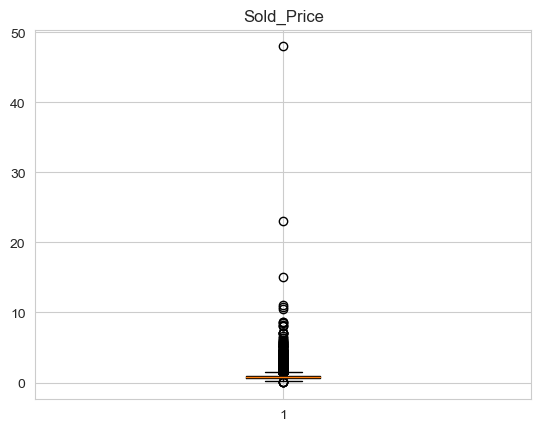

In [53]:
fig1, ax1 = plt.subplots()
ax1.set_title('Sold_Price')
ax1.boxplot(Fairfax_home_cleaned_df4['Sold_Price']/1000000)


In [54]:
cleaned_df = Fairfax_home_cleaned_df4

In [55]:
cleaned_df = cleaned_df.drop(cleaned_df[cleaned_df['Sold_Price']<116250.0].index)

In [56]:
cleaned_df['Sold_Price'].sort_values(ascending = False).tail()

20172    250000.0
3849     246750.0
24431    240000.0
4603     230000.0
9089     230000.0
Name: Sold_Price, dtype: float64

In [57]:
cleaned_df = cleaned_df.drop(cleaned_df[cleaned_df['Sold_Price']>1486250].index)
cleaned_df['Sold_Price'].sort_values(ascending = False).head()

29691    1485753.0
27124    1485000.0
34103    1485000.0
24013    1485000.0
25       1485000.0
Name: Sold_Price, dtype: float64

In [58]:
cleaned_df.shape

(28315, 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f619c08a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1f619c08fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f619c087f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f619c09510>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f619c097b0>],
 'means': []}

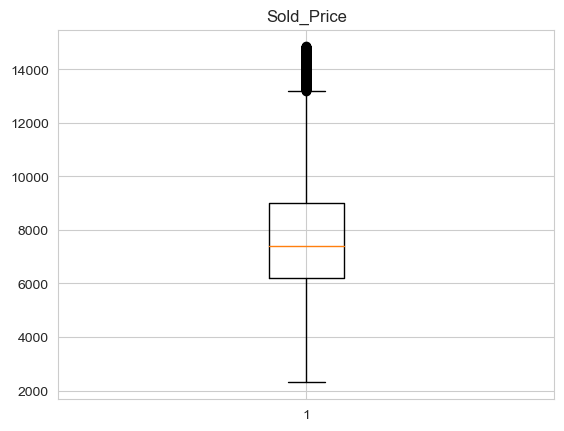

In [59]:
fig1, ax1 = plt.subplots()
ax1.set_title('Sold_Price')
ax1.boxplot(cleaned_df['Sold_Price']/100)

In [60]:
cleaned_df.corr()['Sold_Price'].sort_values(ascending = False)

Sold_Price                   1.000000
Above_Grade_Finished_sqft    0.702614
full_bath                    0.602720
Bedrooms                     0.437714
half_bath                    0.295914
year                         0.197454
Year_Built                   0.190873
month                        0.019628
Cost_per_sqft                0.015276
Lat                         -0.044237
Lon                         -0.049386
Name: Sold_Price, dtype: float64

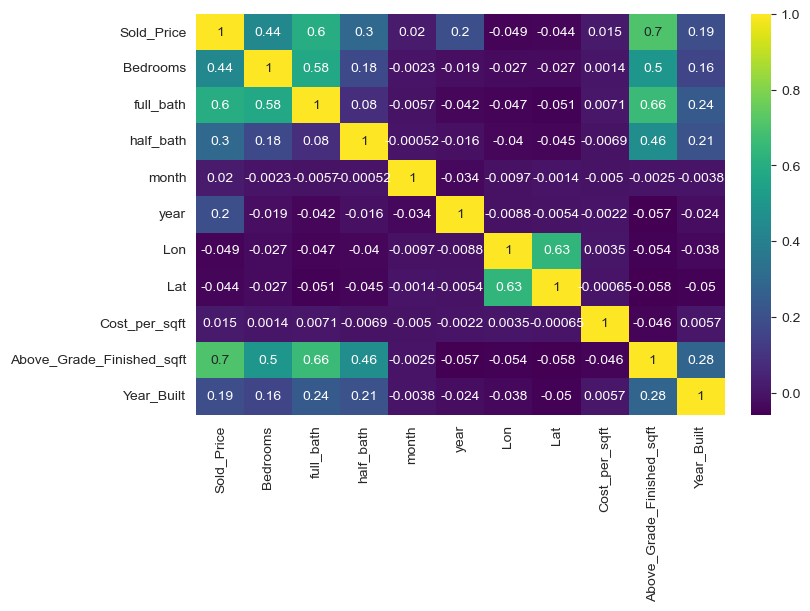

In [61]:
#plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize= (8,6),layout='constrained')
sns.heatmap(cleaned_df.corr(), annot = True, cmap = 'viridis')
fig.savefig("heatmap.png")

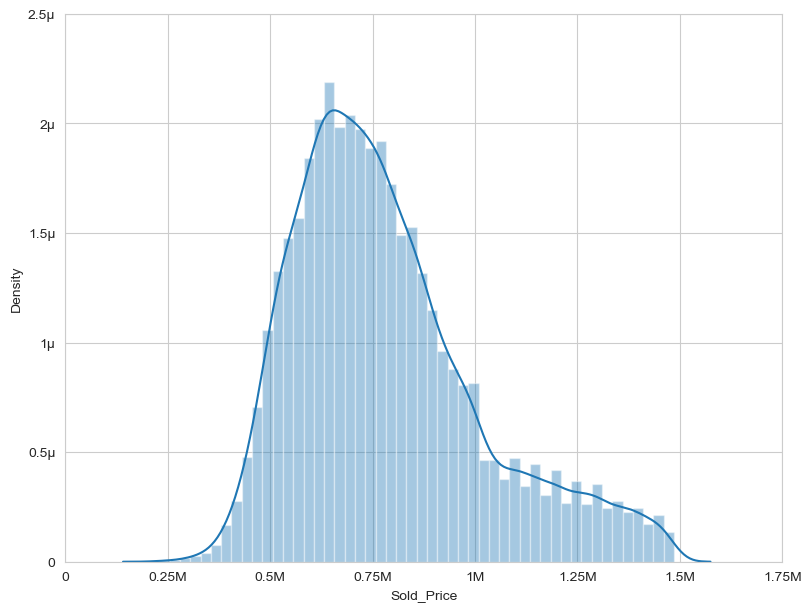

In [62]:
# Plot to see the price ranges of the houses or distribution of the prices of the houses

fig, ax = plt.subplots(figsize= (8,6),layout='constrained')

sns.distplot(cleaned_df['Sold_Price'])

ax.set_xticks(np.arange(0, 2000000, 250000), \
              ['0', '0.25M', '0.5M','0.75M', '1M','1.25M','1.5M','1.75M'])

ax.set_yticks(np.arange(0, 0.000003, 0.0000005), ['0', '0.5μ', '1μ','1.5μ','2μ','2.5μ'])
fig.savefig("sold_price_dist.png")


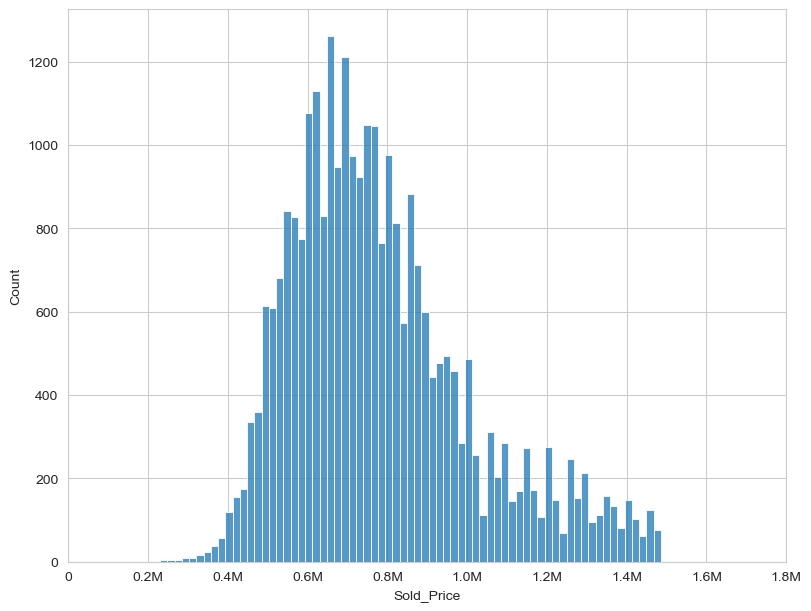

In [63]:
fig, ax = plt.subplots(figsize= (8,6),layout='constrained')

sns.histplot(data=cleaned_df,x='Sold_Price')

ax.set_xticks(np.arange(0, 2000000, 200000), \
              [ '0','0.2M', '0.4M','0.6M', '0.8M','1.0M','1.2M','1.4M','1.6M','1.8M'])
fig.savefig("sold_price_hist.png")

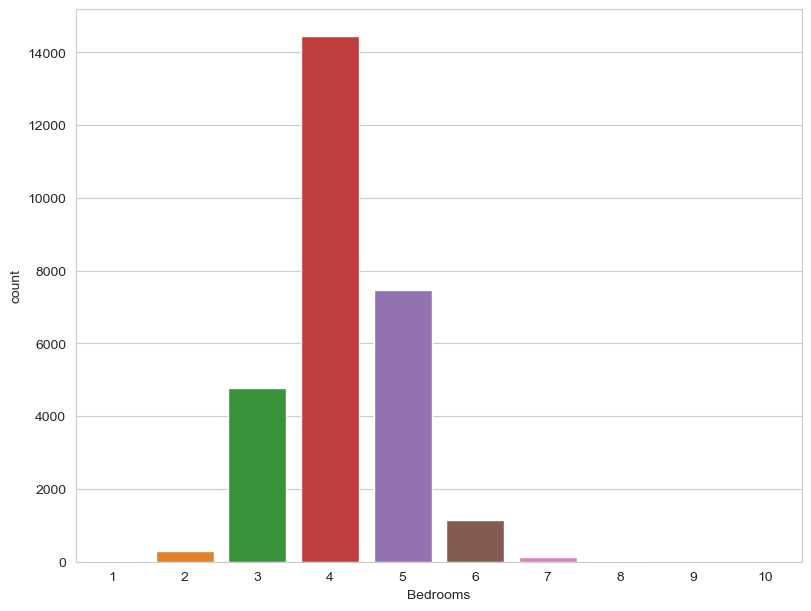

In [64]:
# Let's see the number of bedrooms
fig, ax = plt.subplots(figsize= (8,6),layout='constrained')
sns.countplot(data = cleaned_df, x = 'Bedrooms')
fig.savefig("Berooms.png")

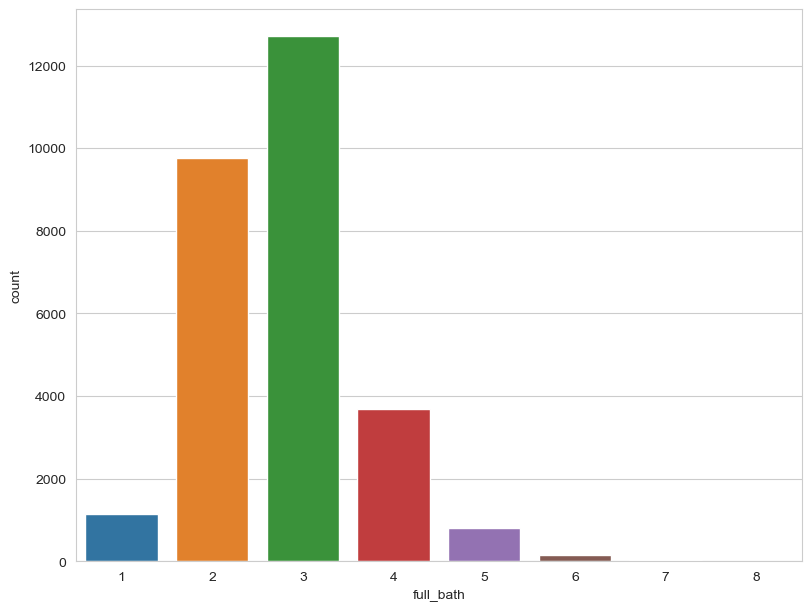

In [65]:
# Let's see the number of bedrooms
fig, ax = plt.subplots(figsize= (8,6),layout='constrained')
sns.countplot(data = cleaned_df, x = 'full_bath')
fig.savefig("Full_bath.png")

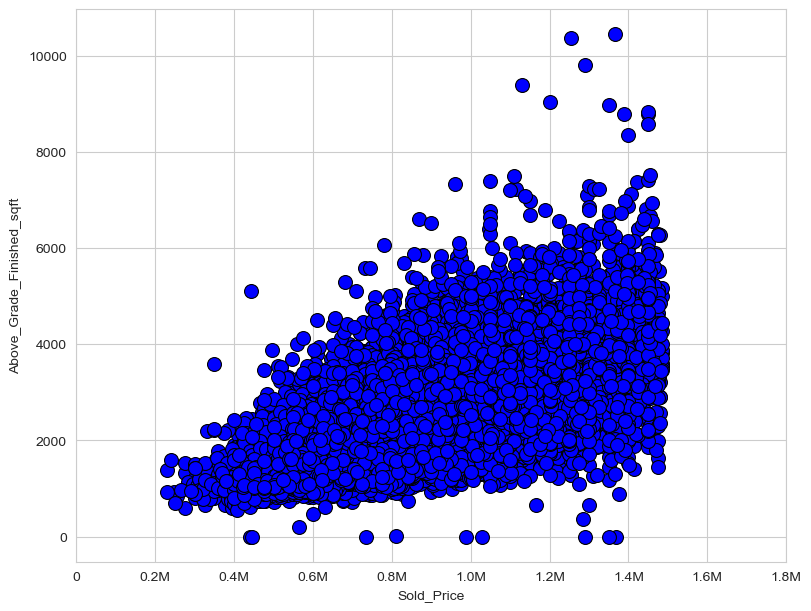

In [66]:
# Sold_Price vs finished living area

fig, ax = plt.subplots(figsize= (8,6),layout='constrained')


sns.scatterplot(y = 'Above_Grade_Finished_sqft', x = 'Sold_Price', data = cleaned_df, 
               color = 'blue', edgecolor = 'black', s = 100 )


ax.set_xticks(np.arange(0, 2000000, 200000), \
              [ '0','0.2M', '0.4M','0.6M', '0.8M','1.0M','1.2M','1.4M','1.6M','1.8M'])
fig.savefig("LivingArea_Price.png")

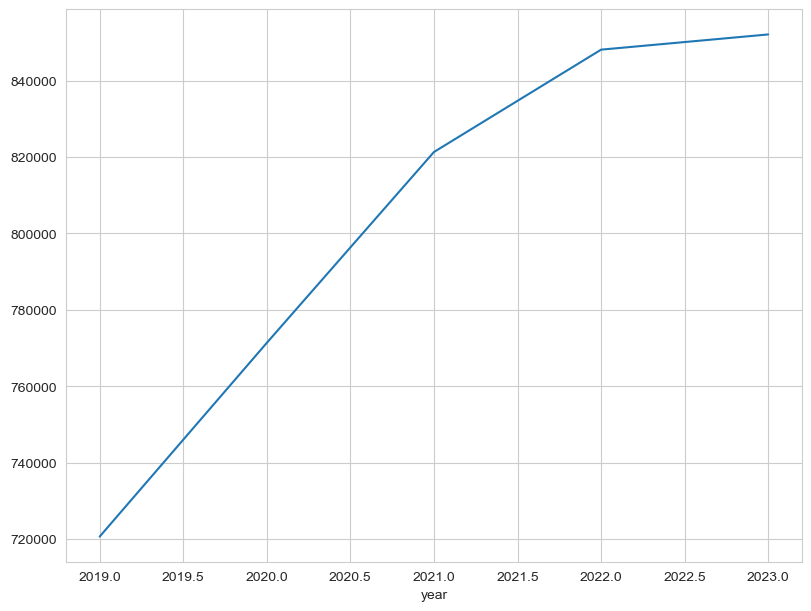

In [67]:
#Let's explore the month/year correlation with price
fig, ax = plt.subplots(figsize= (8,6),layout='constrained')
cleaned_df.groupby('year')['Sold_Price'].mean().plot()
fig.savefig("year_averagePrice.png")

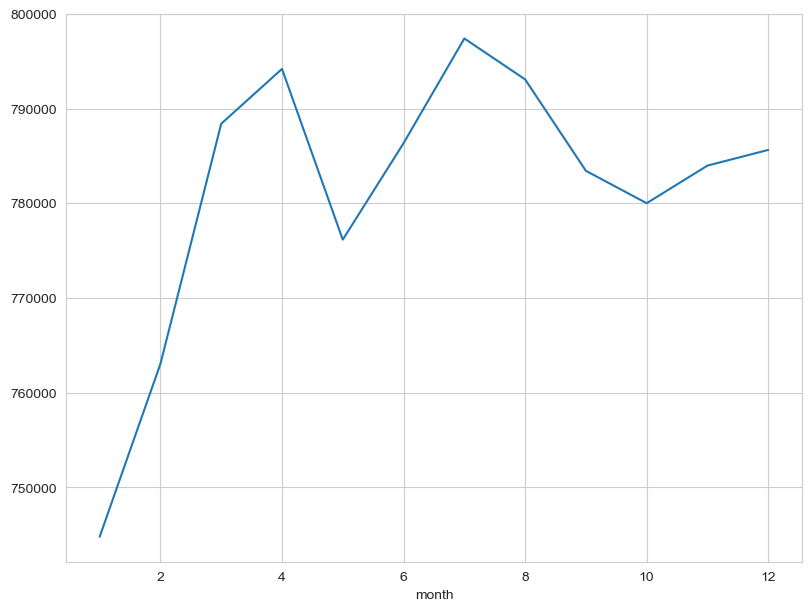

In [68]:
fig, ax = plt.subplots(figsize= (8,6),layout='constrained')
cleaned_df.groupby('month')['Sold_Price'].mean().plot()
fig.savefig("month_averagePrice.png")

# Data Preprocessing

In [69]:
cleaned_df.head()

,Sold_Price,City,Bedrooms,full_bath,half_bath,month,year,Lon,Lat,Cost_per_sqft,Above_Grade_Finished_sqft,Year_Built
0,1252430.0,Herndon,4,4,1,4,2019,-77.348283,38.890769,281.44,4450.0,2019.0
1,950000.0,Vienna,4,3,1,5,2019,-77.265944,38.945249,416.30,2282.0,1969.0
3,1070000.0,Vienna,5,3,1,4,2021,-77.265944,38.945249,468.89,2282.0,1969.0
5,685000.0,Springfield,5,3,0,6,2019,-77.221291,38.788632,457.58,1497.0,1967.0
6,966410.0,Alexandria,5,4,0,6,2019,-77.348283,38.890769,353.74,2732.0,2019.0


In [70]:
cleaned_df.shape

(28315, 12)

In [71]:
 # Convert categorical data to numeric with `pd.get_dummies`
df = pd.get_dummies(cleaned_df)
df.head() 

,Sold_Price,Bedrooms,full_bath,half_bath,month,year,Lon,Lat,Cost_per_sqft,Above_Grade_Finished_sqft,...,City_Lorton,City_Mason Neck,City_Mclean,City_North Springfield,City_Oak Hill,City_Oakton,City_Reston,City_Springfield,City_Vienna,City_West Springfield
0,1252430.0,4,4,1,4,2019,-77.348283,38.890769,281.44,4450.0,...,0,0,0,0,0,0,0,0,0,0
1,950000.0,4,3,1,5,2019,-77.265944,38.945249,416.30,2282.0,...,0,0,0,0,0,0,0,0,1,0
3,1070000.0,5,3,1,4,2021,-77.265944,38.945249,468.89,2282.0,...,0,0,0,0,0,0,0,0,1,0
5,685000.0,5,3,0,6,2019,-77.221291,38.788632,457.58,1497.0,...,0,0,0,0,0,0,0,1,0,0
6,966410.0,5,4,0,6,2019,-77.348283,38.890769,353.74,2732.0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Split the data into x and y where the Sold_Price is the target value
X= df.drop('Sold_Price', axis = 1).values
y = df['Sold_Price'].values

In [73]:
X.shape

(28315, 34)

In [74]:
y.shape

(28315,)

In [75]:
#Import train_test_split  from sklearn
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

In [79]:
X_train = scaler.fit_transform(X_train)

In [80]:
X_test_scaled = scaler.transform(X_test)

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# 1. Training the Model Without Dropout/Early_Stop Layer

In [82]:
model = Sequential()
model.add(Dense(102, activation = 'relu'))
model.add(Dense(102, activation = 'relu'))
model.add(Dense(102, activation = 'relu'))
# Output layer
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'rmsprop', loss = 'mse')

In [83]:
#Train the model and validate the model with test sets. The loss indicates the training loss while the val_loss 
#is for the test data loss
model.fit(x =X_train, y = y_train, validation_data = (X_test_scaled, y_test), batch_size = 128, epochs = 1000)

Epoch 1/1000
166/166 [==============================] - 1s 4ms/step - loss: 663720558592.0000 - val_loss: 664526454784.0000
Epoch 2/1000
166/166 [==============================] - 1s 3ms/step - loss: 635465826304.0000 - val_loss: 604808085504.0000
Epoch 3/1000
166/166 [==============================] - 1s 3ms/step - loss: 525499760640.0000 - val_loss: 433895178240.0000
Epoch 4/1000
166/166 [==============================] - 1s 3ms/step - loss: 303178252288.0000 - val_loss: 173326008320.0000
Epoch 5/1000
166/166 [==============================] - 1s 3ms/step - loss: 81534902272.0000 - val_loss: 34393055232.0000
Epoch 6/1000
166/166 [==============================] - 0s 3ms/step - loss: 22713149440.0000 - val_loss: 21740296192.0000
Epoch 7/1000
166/166 [==============================] - 0s 3ms/step - loss: 18010062848.0000 - val_loss: 18927120384.0000
Epoch 8/1000
166/166 [==============================] - 1s 3ms/step - loss: 16276239360.0000 - val_loss: 17356818432.0000
Epoch 9/1000
166

166/166 [==============================] - 0s 3ms/step - loss: 12111879168.0000 - val_loss: 13266833408.0000
Epoch 134/1000
166/166 [==============================] - 0s 3ms/step - loss: 12105923584.0000 - val_loss: 13225305088.0000
Epoch 135/1000
166/166 [==============================] - 0s 3ms/step - loss: 12109886464.0000 - val_loss: 13248158720.0000
Epoch 136/1000
166/166 [==============================] - 0s 3ms/step - loss: 12087629824.0000 - val_loss: 13269753856.0000
Epoch 137/1000
166/166 [==============================] - 0s 3ms/step - loss: 12099866624.0000 - val_loss: 13258218496.0000
Epoch 138/1000
166/166 [==============================] - 0s 3ms/step - loss: 12093401088.0000 - val_loss: 13226466304.0000
Epoch 139/1000
166/166 [==============================] - 0s 3ms/step - loss: 12070918144.0000 - val_loss: 13210480640.0000
Epoch 140/1000
166/166 [==============================] - 0s 3ms/step - loss: 12083730432.0000 - val_loss: 13195649024.0000
Epoch 141/1000
166/166 

166/166 [==============================] - 0s 3ms/step - loss: 11637535744.0000 - val_loss: 12587503616.0000
Epoch 266/1000
166/166 [==============================] - 0s 3ms/step - loss: 11626784768.0000 - val_loss: 12593221632.0000
Epoch 267/1000
166/166 [==============================] - 0s 3ms/step - loss: 11616188416.0000 - val_loss: 12590778368.0000
Epoch 268/1000
166/166 [==============================] - 0s 3ms/step - loss: 11625659392.0000 - val_loss: 12579811328.0000
Epoch 269/1000
166/166 [==============================] - 0s 3ms/step - loss: 11616137216.0000 - val_loss: 12586479616.0000
Epoch 270/1000
166/166 [==============================] - 0s 3ms/step - loss: 11615610880.0000 - val_loss: 12601550848.0000
Epoch 271/1000
166/166 [==============================] - 0s 3ms/step - loss: 11637109760.0000 - val_loss: 12539922432.0000
Epoch 272/1000
166/166 [==============================] - 0s 3ms/step - loss: 11612259328.0000 - val_loss: 12547396608.0000
Epoch 273/1000
166/166 

166/166 [==============================] - 0s 3ms/step - loss: 10662951936.0000 - val_loss: 11534205952.0000
Epoch 398/1000
166/166 [==============================] - 0s 3ms/step - loss: 10650155008.0000 - val_loss: 11520410624.0000
Epoch 399/1000
166/166 [==============================] - 0s 3ms/step - loss: 10613226496.0000 - val_loss: 11551684608.0000
Epoch 400/1000
166/166 [==============================] - 0s 3ms/step - loss: 10596695040.0000 - val_loss: 11497782272.0000
Epoch 401/1000
166/166 [==============================] - 0s 3ms/step - loss: 10589175808.0000 - val_loss: 11508287488.0000
Epoch 402/1000
166/166 [==============================] - 0s 3ms/step - loss: 10586022912.0000 - val_loss: 11452666880.0000
Epoch 403/1000
166/166 [==============================] - 0s 3ms/step - loss: 10612470784.0000 - val_loss: 11434345472.0000
Epoch 404/1000
166/166 [==============================] - 0s 3ms/step - loss: 10544613376.0000 - val_loss: 11448437760.0000
Epoch 405/1000
166/166 

166/166 [==============================] - 0s 3ms/step - loss: 3162553600.0000 - val_loss: 4581329920.0000
Epoch 531/1000
166/166 [==============================] - 0s 3ms/step - loss: 3119054080.0000 - val_loss: 4563805696.0000
Epoch 532/1000
166/166 [==============================] - 0s 3ms/step - loss: 3083273472.0000 - val_loss: 4534811648.0000
Epoch 533/1000
166/166 [==============================] - 0s 3ms/step - loss: 3069113344.0000 - val_loss: 4555687424.0000
Epoch 534/1000
166/166 [==============================] - 0s 3ms/step - loss: 3009276416.0000 - val_loss: 4419939840.0000
Epoch 535/1000
166/166 [==============================] - 0s 3ms/step - loss: 2984169728.0000 - val_loss: 4363684352.0000
Epoch 536/1000
166/166 [==============================] - 0s 3ms/step - loss: 2948091136.0000 - val_loss: 4367552512.0000
Epoch 537/1000
166/166 [==============================] - 0s 3ms/step - loss: 2926644480.0000 - val_loss: 4307369472.0000
Epoch 538/1000
166/166 [===============

166/166 [==============================] - 0s 3ms/step - loss: 1346466432.0000 - val_loss: 2297466880.0000
Epoch 665/1000
166/166 [==============================] - 0s 3ms/step - loss: 1343416192.0000 - val_loss: 2444354560.0000
Epoch 666/1000
166/166 [==============================] - 0s 3ms/step - loss: 1337981824.0000 - val_loss: 2267413504.0000
Epoch 667/1000
166/166 [==============================] - 0s 3ms/step - loss: 1331497984.0000 - val_loss: 2280157184.0000
Epoch 668/1000
166/166 [==============================] - 0s 3ms/step - loss: 1330764160.0000 - val_loss: 2242395648.0000
Epoch 669/1000
166/166 [==============================] - 0s 3ms/step - loss: 1322174848.0000 - val_loss: 2259911168.0000
Epoch 670/1000
166/166 [==============================] - 0s 3ms/step - loss: 1321325312.0000 - val_loss: 2569114112.0000
Epoch 671/1000
166/166 [==============================] - 0s 3ms/step - loss: 1305355008.0000 - val_loss: 2244622592.0000
Epoch 672/1000
166/166 [===============

Epoch 799/1000
166/166 [==============================] - 0s 3ms/step - loss: 802753536.0000 - val_loss: 1589098880.0000
Epoch 800/1000
166/166 [==============================] - 0s 3ms/step - loss: 799206464.0000 - val_loss: 1677503360.0000
Epoch 801/1000
166/166 [==============================] - 0s 3ms/step - loss: 803228608.0000 - val_loss: 1560165376.0000
Epoch 802/1000
166/166 [==============================] - 0s 3ms/step - loss: 805279744.0000 - val_loss: 1965848832.0000
Epoch 803/1000
166/166 [==============================] - 0s 3ms/step - loss: 794739840.0000 - val_loss: 1564800512.0000
Epoch 804/1000
166/166 [==============================] - 0s 3ms/step - loss: 790226752.0000 - val_loss: 1544507392.0000
Epoch 805/1000
166/166 [==============================] - 0s 3ms/step - loss: 792821696.0000 - val_loss: 1458693888.0000
Epoch 806/1000
166/166 [==============================] - 0s 3ms/step - loss: 783952512.0000 - val_loss: 1586086272.0000
Epoch 807/1000
166/166 [========

Epoch 934/1000
166/166 [==============================] - 0s 3ms/step - loss: 535694880.0000 - val_loss: 1065901632.0000
Epoch 935/1000
166/166 [==============================] - 0s 3ms/step - loss: 537751040.0000 - val_loss: 1121500928.0000
Epoch 936/1000
166/166 [==============================] - 0s 3ms/step - loss: 529947072.0000 - val_loss: 1354295936.0000
Epoch 937/1000
166/166 [==============================] - 0s 3ms/step - loss: 535209056.0000 - val_loss: 1220190336.0000
Epoch 938/1000
166/166 [==============================] - 0s 3ms/step - loss: 534679744.0000 - val_loss: 1085574528.0000
Epoch 939/1000
166/166 [==============================] - 1s 3ms/step - loss: 525926176.0000 - val_loss: 1235256448.0000
Epoch 940/1000
166/166 [==============================] - 0s 3ms/step - loss: 533371776.0000 - val_loss: 1129085952.0000
Epoch 941/1000
166/166 [==============================] - 0s 3ms/step - loss: 530943968.0000 - val_loss: 1104327808.0000
Epoch 942/1000
166/166 [========

In [84]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,6.637206e+11,6.645265e+11
1,6.354658e+11,6.048081e+11
2,5.254998e+11,4.338952e+11
3,3.031783e+11,1.733260e+11
4,8.153490e+10,3.439306e+10


<Axes: >

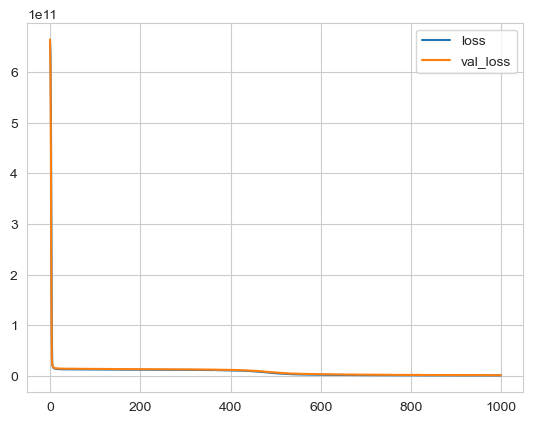

In [85]:
losses.plot()

In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [87]:
predictions = model.predict(X_test_scaled)

222/222 [==============================] - 0s 1ms/step


In [88]:
MAE = mean_absolute_error(y_test,predictions)

In [89]:
EVS = explained_variance_score(y_test,predictions)

In [90]:
r_sqrd = r2_score(y_test,predictions)
r_sqrd

0.9824608999962039

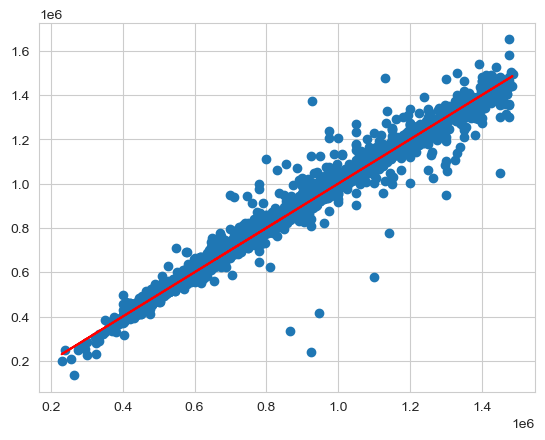

In [91]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [92]:
# Drop the sold price column and grap the first row house for testing as if totally unknown house is given to the model and 
# and see if the model can predict a price for it
single_house = df.drop('Sold_Price',axis=1).iloc[0]

In [93]:
single_house.shape

(34,)

In [94]:
single_house = scaler.transform(single_house.values.reshape(-1, 34))

In [95]:
Test_result = model.predict(single_house)

1/1 [==============================] - 0s 21ms/step


In [96]:
# Convert to one dimensinal array
Test_Result = Test_result.flatten()

In [97]:
true_value = cleaned_df['Sold_Price'][0]

In [98]:
Report1 = {'Training_Method': ['Normal'], 'EVS':EVS , 'r_squared' : r_sqrd, 'MAE':MAE, \
           'True_price':true_value, 'Test_result':Test_Result}

In [99]:
report_df1 = pd.DataFrame(Report1)

In [100]:
report_df1

,Training_Method,EVS,r_squared,MAE,True_price,Test_result
0,Normal,0.982505,0.982461,14447.214091,1252430.0,1215232.75


# 2. Training the Model with Early_Stopping 

In [101]:
# Adding an early stopping (callback) mechanism
from tensorflow.keras.callbacks import EarlyStopping

In [102]:
# #This callback will stop the training when there is no improvement in the loss for 25 consecutive epochs.
early_stop = EarlyStopping(monitor = 'val_loss' , mode = 'min', verbose = 1, patience = 200)

In [103]:
model = Sequential()
model.add(Dense(102, activation = 'relu'))
model.add(Dense(102, activation = 'relu'))
model.add(Dense(102, activation = 'relu'))
# Output layer
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'rmsprop', loss = 'mse')

In [104]:
model.fit(x =X_train, y = y_train, validation_data = (X_test_scaled, y_test), \
          epochs =1000, batch_size = 32, callbacks = [early_stop])

Epoch 1/1000
664/664 [==============================] - 2s 2ms/step - loss: 531365593088.0000 - val_loss: 164684578816.0000
Epoch 2/1000
664/664 [==============================] - 2s 2ms/step - loss: 33208813568.0000 - val_loss: 18567804928.0000
Epoch 3/1000
664/664 [==============================] - 1s 2ms/step - loss: 15856849920.0000 - val_loss: 16100283392.0000
Epoch 4/1000
664/664 [==============================] - 1s 2ms/step - loss: 14431592448.0000 - val_loss: 15196395520.0000
Epoch 5/1000
664/664 [==============================] - 1s 2ms/step - loss: 14155905024.0000 - val_loss: 14653849600.0000
Epoch 6/1000
664/664 [==============================] - 1s 2ms/step - loss: 15534773248.0000 - val_loss: 14380190720.0000
Epoch 7/1000
664/664 [==============================] - 1s 2ms/step - loss: 15727240192.0000 - val_loss: 14245509120.0000
Epoch 8/1000
664/664 [==============================] - 2s 2ms/step - loss: 15457586176.0000 - val_loss: 14065425408.0000
Epoch 9/1000
664/664 [

664/664 [==============================] - 1s 2ms/step - loss: 34102302720.0000 - val_loss: 13394228224.0000
Epoch 134/1000
664/664 [==============================] - 1s 2ms/step - loss: 33724706816.0000 - val_loss: 13341285376.0000
Epoch 135/1000
664/664 [==============================] - 1s 2ms/step - loss: 33120645120.0000 - val_loss: 13286697984.0000
Epoch 136/1000
664/664 [==============================] - 1s 2ms/step - loss: 34492141568.0000 - val_loss: 13424905216.0000
Epoch 137/1000
664/664 [==============================] - 1s 2ms/step - loss: 34123687936.0000 - val_loss: 13592249344.0000
Epoch 138/1000
664/664 [==============================] - 1s 2ms/step - loss: 33401047040.0000 - val_loss: 13717112832.0000
Epoch 139/1000
664/664 [==============================] - 1s 2ms/step - loss: 32670388224.0000 - val_loss: 13228411904.0000
Epoch 140/1000
664/664 [==============================] - 1s 2ms/step - loss: 34247335936.0000 - val_loss: 13747886080.0000
Epoch 141/1000
664/664 

Epoch 266/1000
664/664 [==============================] - 1s 2ms/step - loss: 1390222720.0000 - val_loss: 1800308352.0000
Epoch 267/1000
664/664 [==============================] - 1s 2ms/step - loss: 1305896576.0000 - val_loss: 2014496000.0000
Epoch 268/1000
664/664 [==============================] - 1s 2ms/step - loss: 1296417024.0000 - val_loss: 1546005248.0000
Epoch 269/1000
664/664 [==============================] - 1s 2ms/step - loss: 1298188800.0000 - val_loss: 1868666624.0000
Epoch 270/1000
664/664 [==============================] - 1s 2ms/step - loss: 1260548992.0000 - val_loss: 1501245056.0000
Epoch 271/1000
664/664 [==============================] - 1s 2ms/step - loss: 1310037248.0000 - val_loss: 1426217472.0000
Epoch 272/1000
664/664 [==============================] - 1s 2ms/step - loss: 1255500544.0000 - val_loss: 3030682112.0000
Epoch 273/1000
664/664 [==============================] - 1s 2ms/step - loss: 1272684416.0000 - val_loss: 1631066752.0000
Epoch 274/1000
664/664 [

664/664 [==============================] - 1s 2ms/step - loss: 887533440.0000 - val_loss: 1392958080.0000
Epoch 401/1000
664/664 [==============================] - 1s 2ms/step - loss: 905943808.0000 - val_loss: 1380049536.0000
Epoch 402/1000
664/664 [==============================] - 1s 2ms/step - loss: 885037952.0000 - val_loss: 1416794240.0000
Epoch 403/1000
664/664 [==============================] - 1s 2ms/step - loss: 897964800.0000 - val_loss: 1588934400.0000
Epoch 404/1000
664/664 [==============================] - 1s 2ms/step - loss: 877382208.0000 - val_loss: 1352106368.0000
Epoch 405/1000
664/664 [==============================] - 1s 2ms/step - loss: 902712128.0000 - val_loss: 1380419968.0000
Epoch 406/1000
664/664 [==============================] - 1s 2ms/step - loss: 876807744.0000 - val_loss: 1414208384.0000
Epoch 407/1000
664/664 [==============================] - 1s 2ms/step - loss: 894300352.0000 - val_loss: 1549279744.0000
Epoch 408/1000
664/664 [=======================

Epoch 468/1000
664/664 [==============================] - 1s 2ms/step - loss: 787375424.0000 - val_loss: 1475112448.0000
Epoch 469/1000
664/664 [==============================] - 1s 2ms/step - loss: 780756352.0000 - val_loss: 1443704576.0000
Epoch 470/1000
664/664 [==============================] - 1s 2ms/step - loss: 766290496.0000 - val_loss: 1304403200.0000
Epoch 471/1000
664/664 [==============================] - 1s 2ms/step - loss: 775653056.0000 - val_loss: 1769059968.0000
Epoch 472/1000
664/664 [==============================] - 1s 2ms/step - loss: 776767296.0000 - val_loss: 1408869504.0000
Epoch 473/1000
664/664 [==============================] - 1s 2ms/step - loss: 796641472.0000 - val_loss: 1372737920.0000
Epoch 474/1000
664/664 [==============================] - 1s 2ms/step - loss: 788954432.0000 - val_loss: 3117338112.0000
Epoch 475/1000
664/664 [==============================] - 1s 2ms/step - loss: 773346304.0000 - val_loss: 1778353408.0000
Epoch 476/1000
664/664 [========

Epoch 603/1000
664/664 [==============================] - 1s 2ms/step - loss: 602500352.0000 - val_loss: 1358576768.0000
Epoch 604/1000
664/664 [==============================] - 1s 2ms/step - loss: 611197696.0000 - val_loss: 1350607488.0000
Epoch 605/1000
664/664 [==============================] - 1s 2ms/step - loss: 589942656.0000 - val_loss: 1590306560.0000
Epoch 606/1000
664/664 [==============================] - 1s 2ms/step - loss: 594727936.0000 - val_loss: 1768819200.0000
Epoch 607/1000
664/664 [==============================] - 1s 2ms/step - loss: 606155648.0000 - val_loss: 1415939328.0000
Epoch 608/1000
664/664 [==============================] - 1s 2ms/step - loss: 591359936.0000 - val_loss: 3020621312.0000
Epoch 609/1000
664/664 [==============================] - 1s 2ms/step - loss: 596448512.0000 - val_loss: 1435066112.0000
Epoch 610/1000
664/664 [==============================] - 1s 2ms/step - loss: 587840128.0000 - val_loss: 1398418176.0000
Epoch 611/1000
664/664 [========

Epoch 738/1000
664/664 [==============================] - 1s 2ms/step - loss: 502816032.0000 - val_loss: 1241127296.0000
Epoch 739/1000
664/664 [==============================] - 1s 2ms/step - loss: 481699200.0000 - val_loss: 1391069312.0000
Epoch 740/1000
664/664 [==============================] - 1s 2ms/step - loss: 483089184.0000 - val_loss: 1300067840.0000
Epoch 741/1000
664/664 [==============================] - 1s 2ms/step - loss: 481432768.0000 - val_loss: 1553148928.0000
Epoch 742/1000
664/664 [==============================] - 1s 2ms/step - loss: 507953248.0000 - val_loss: 1476848000.0000
Epoch 743/1000
664/664 [==============================] - 1s 2ms/step - loss: 487338976.0000 - val_loss: 2530670848.0000
Epoch 744/1000
664/664 [==============================] - 1s 2ms/step - loss: 476456288.0000 - val_loss: 1246791680.0000
Epoch 745/1000
664/664 [==============================] - 1s 2ms/step - loss: 497673088.0000 - val_loss: 1218266240.0000
Epoch 746/1000
664/664 [========

Epoch 873/1000
664/664 [==============================] - 1s 2ms/step - loss: 435232224.0000 - val_loss: 1654214016.0000
Epoch 874/1000
664/664 [==============================] - 1s 2ms/step - loss: 441679104.0000 - val_loss: 1037332928.0000
Epoch 875/1000
664/664 [==============================] - 1s 2ms/step - loss: 420155360.0000 - val_loss: 1119363328.0000
Epoch 876/1000
664/664 [==============================] - 1s 2ms/step - loss: 435314592.0000 - val_loss: 1371375104.0000
Epoch 877/1000
664/664 [==============================] - 1s 2ms/step - loss: 425940832.0000 - val_loss: 1034991744.0000
Epoch 878/1000
664/664 [==============================] - 1s 2ms/step - loss: 436902464.0000 - val_loss: 1267437952.0000
Epoch 879/1000
664/664 [==============================] - 1s 2ms/step - loss: 446267552.0000 - val_loss: 1078816128.0000
Epoch 880/1000
664/664 [==============================] - 1s 2ms/step - loss: 431350752.0000 - val_loss: 1146938496.0000
Epoch 881/1000
664/664 [========

Epoch 941/1000
664/664 [==============================] - 1s 2ms/step - loss: 472587872.0000 - val_loss: 1086892288.0000
Epoch 942/1000
664/664 [==============================] - 1s 2ms/step - loss: 402141440.0000 - val_loss: 1164156416.0000
Epoch 943/1000
664/664 [==============================] - 1s 2ms/step - loss: 448866912.0000 - val_loss: 956263040.0000
Epoch 944/1000
664/664 [==============================] - 1s 2ms/step - loss: 437258912.0000 - val_loss: 929771136.0000
Epoch 945/1000
664/664 [==============================] - 1s 2ms/step - loss: 469771424.0000 - val_loss: 968219712.0000
Epoch 946/1000
664/664 [==============================] - 1s 2ms/step - loss: 425761120.0000 - val_loss: 932974592.0000
Epoch 947/1000
664/664 [==============================] - 1s 2ms/step - loss: 416637760.0000 - val_loss: 1076994304.0000
Epoch 948/1000
664/664 [==============================] - 1s 2ms/step - loss: 412091360.0000 - val_loss: 959817792.0000
Epoch 949/1000
664/664 [=============

In [105]:
losses = pd.DataFrame(model.history.history)

<Axes: >

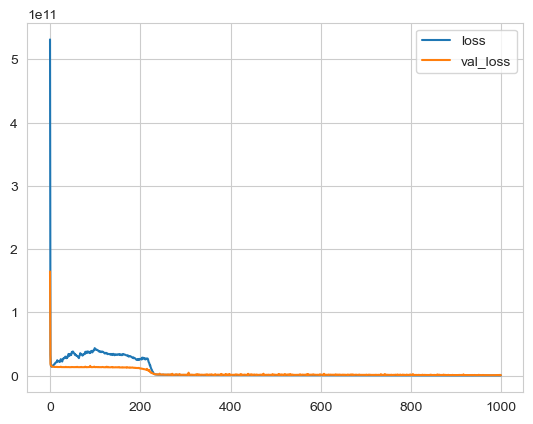

In [106]:
losses.plot()

In [107]:
predictions = model.predict(X_test_scaled)

222/222 [==============================] - 0s 1ms/step


In [108]:
MAE = mean_absolute_error(y_test,predictions)

In [109]:
EVS = explained_variance_score(y_test,predictions)

In [110]:
r_sqrd = r2_score(y_test,predictions)

In [111]:
r_sqrd

0.9845898717900642

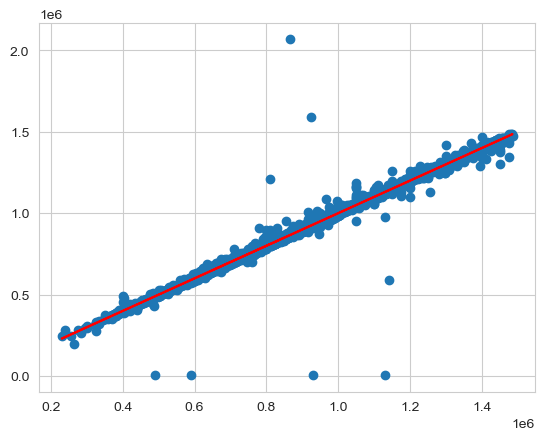

In [112]:
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test,'r')

In [113]:
# Drop the sold price column and grap the first row house for testing as if totally unknown house is given to the model and 
# and see if the model can predict a price for it

single_house = df.drop('Sold_Price',axis=1).iloc[0]

In [114]:
single_house.shape

(34,)

In [115]:
single_house = scaler.transform(single_house.values.reshape(-1, 34))

In [116]:
Test_result = model.predict(single_house)

1/1 [==============================] - 0s 16ms/step


In [117]:
# Convert to one dimensinal array 
Test_Result = Test_result.flatten()

In [118]:
true_value = cleaned_df['Sold_Price'][0]

In [119]:
report2 = {'Training_Method': ['Early_Stopping'], 'EVS':EVS , 'r_squared' : r_sqrd, 'MAE':MAE, \
           'True_price':true_value, 'Test_result':Test_Result}

In [120]:
report_df2 = pd.DataFrame(report2)

In [121]:
report_df2 

,Training_Method,EVS,r_squared,MAE,True_price,Test_result
0,Early_Stopping,0.984592,0.98459,6626.082342,1252430.0,1252577.875


# 3. Training the Model Using the Dropout Layer and Early_Stop

In [122]:
# Import the Dropout layer from sklearn
from tensorflow.keras.layers import Dropout

In [123]:
model = Sequential()
# First Layer
model.add(Dense(102, activation = 'relu'))
model.add(Dropout(0.5))
# Second Layer
model.add(Dense(102, activation = 'relu'))
model.add(Dropout(0.5))
# Third Layer
model.add(Dense(102, activation = 'relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'rmsprop', loss = 'mse')

In [124]:
# Start the model training and validate the model as well
model.fit(x =X_train, y = y_train, validation_data = (X_test_scaled, y_test), \
          epochs = 1000, batch_size = 32,callbacks = [early_stop])

Epoch 1/1000
664/664 [==============================] - 2s 3ms/step - loss: 542592499712.0000 - val_loss: 188490448896.0000
Epoch 2/1000
664/664 [==============================] - 2s 2ms/step - loss: 62823682048.0000 - val_loss: 21059086336.0000
Epoch 3/1000
664/664 [==============================] - 2s 2ms/step - loss: 43666796544.0000 - val_loss: 18079457280.0000
Epoch 4/1000
664/664 [==============================] - 2s 2ms/step - loss: 42169339904.0000 - val_loss: 17983776768.0000
Epoch 5/1000
664/664 [==============================] - 2s 2ms/step - loss: 40733437952.0000 - val_loss: 16766681088.0000
Epoch 6/1000
664/664 [==============================] - 2s 2ms/step - loss: 40849207296.0000 - val_loss: 16590555136.0000
Epoch 7/1000
664/664 [==============================] - 2s 2ms/step - loss: 39571304448.0000 - val_loss: 15922534400.0000
Epoch 8/1000
664/664 [==============================] - 2s 2ms/step - loss: 40368840704.0000 - val_loss: 15712784384.0000
Epoch 9/1000
664/664 [

Epoch 133/1000
664/664 [==============================] - 2s 2ms/step - loss: 756722565120.0000 - val_loss: 14699242496.0000
Epoch 134/1000
664/664 [==============================] - 2s 3ms/step - loss: 915756875776.0000 - val_loss: 14719408128.0000
Epoch 135/1000
664/664 [==============================] - 2s 3ms/step - loss: 918702129152.0000 - val_loss: 14607019008.0000
Epoch 136/1000
664/664 [==============================] - 2s 3ms/step - loss: 930157756416.0000 - val_loss: 16182630400.0000
Epoch 137/1000
664/664 [==============================] - 2s 3ms/step - loss: 697884934144.0000 - val_loss: 15574171648.0000
Epoch 138/1000
664/664 [==============================] - 2s 3ms/step - loss: 1017262964736.0000 - val_loss: 15213870080.0000
Epoch 139/1000
664/664 [==============================] - 2s 3ms/step - loss: 750891761664.0000 - val_loss: 14242741248.0000
Epoch 140/1000
664/664 [==============================] - 2s 3ms/step - loss: 794900430848.0000 - val_loss: 14955357184.0000

In [125]:
losses = pd.DataFrame(model.history.history)

<Axes: >

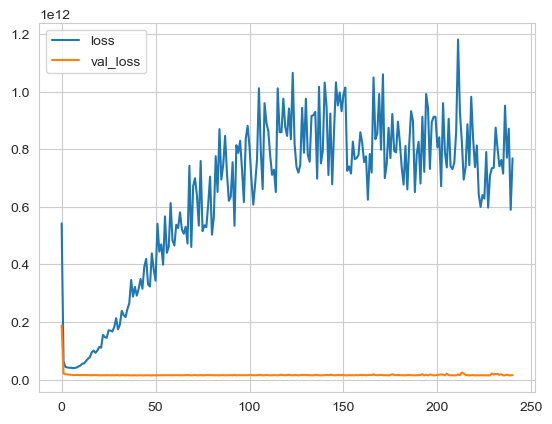

In [126]:
losses.plot()

In [127]:
predictions = model.predict(X_test_scaled)

222/222 [==============================] - 0s 1ms/step


In [128]:
predictions

array([[ 639642. ],
       [ 997108.2],
       [ 613251.3],
       ...,
       [ 662263.2],
       [1017625.9],
       [ 828555.4]], dtype=float32)

In [129]:
MAE = mean_absolute_error(y_test,predictions)

In [130]:
# Check how much variance is explained by the actual model.
EVS = explained_variance_score(y_test,predictions)

In [131]:
r_sqrd = r2_score(y_test,predictions)

In [132]:
r_sqrd

0.7165970124701974

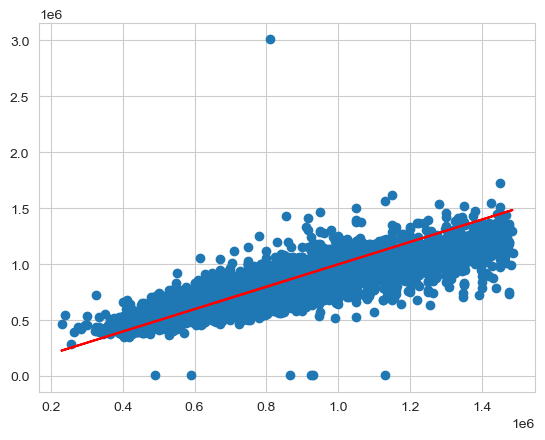

In [133]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [134]:
# Drop the sold price column and grap the first row house for testing as if totally unknown house is given to the model and 
# and see if the model can predict a price for it

single_house = df.drop('Sold_Price',axis=1).iloc[0]

In [135]:
single_house.shape

(34,)

In [136]:
single_house = scaler.transform(single_house.values.reshape(-1, 34))

In [137]:
Test_result = model.predict(single_house)

1/1 [==============================] - 0s 16ms/step


In [138]:
# Convert to one dimensinal array
Test_Result = Test_result.flatten()

In [139]:
true_value = cleaned_df['Sold_Price'][0]

In [140]:
report3 = {'Training_Method': ['Dropout_EarlyStopping'], 'EVS':EVS , 'r_squared' : r_sqrd, 'MAE':MAE, \
           'True_price':true_value, 'Test_result':Test_Result}

In [141]:
report3_df = pd.DataFrame(report3)

In [142]:
report3_df

,Training_Method,EVS,r_squared,MAE,True_price,Test_result
0,Dropout_EarlyStopping,0.738873,0.716597,85920.974953,1252430.0,980880.25


# 4. With Dropout Layer Only

In [143]:
model = Sequential()
# First Layer
model.add(Dense(102, activation = 'relu'))
model.add(Dropout(0.4))
# Second Layer
model.add(Dense(102, activation = 'relu'))
model.add(Dropout(0.4))
# Third Layer
model.add(Dense(102, activation = 'relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'rmsprop', loss = 'mse')

In [144]:
model.fit(x =X_train, y = y_train, validation_data = (X_test_scaled, y_test), \
          epochs = 1000, batch_size = 32)

Epoch 1/1000
664/664 [==============================] - 2s 3ms/step - loss: 536154898432.0000 - val_loss: 175255568384.0000
Epoch 2/1000
664/664 [==============================] - 2s 3ms/step - loss: 52719599616.0000 - val_loss: 20171563008.0000
Epoch 3/1000
664/664 [==============================] - 2s 3ms/step - loss: 35240550400.0000 - val_loss: 17642346496.0000
Epoch 4/1000
664/664 [==============================] - 2s 3ms/step - loss: 34051196928.0000 - val_loss: 16857477120.0000
Epoch 5/1000
664/664 [==============================] - 2s 3ms/step - loss: 33238179840.0000 - val_loss: 16327477248.0000
Epoch 6/1000
664/664 [==============================] - 2s 3ms/step - loss: 32267001856.0000 - val_loss: 15426099200.0000
Epoch 7/1000
664/664 [==============================] - 2s 3ms/step - loss: 31894192128.0000 - val_loss: 15295793152.0000
Epoch 8/1000
664/664 [==============================] - 2s 3ms/step - loss: 32701198336.0000 - val_loss: 15560279040.0000
Epoch 9/1000
664/664 [

Epoch 133/1000
664/664 [==============================] - 2s 3ms/step - loss: 593133961216.0000 - val_loss: 14330320896.0000
Epoch 134/1000
664/664 [==============================] - 2s 3ms/step - loss: 538046234624.0000 - val_loss: 14069045248.0000
Epoch 135/1000
664/664 [==============================] - 2s 3ms/step - loss: 434145591296.0000 - val_loss: 14401890304.0000
Epoch 136/1000
664/664 [==============================] - 2s 3ms/step - loss: 404505919488.0000 - val_loss: 14589674496.0000
Epoch 137/1000
664/664 [==============================] - 2s 3ms/step - loss: 482513813504.0000 - val_loss: 14470466560.0000
Epoch 138/1000
664/664 [==============================] - 2s 3ms/step - loss: 445015228416.0000 - val_loss: 14668744704.0000
Epoch 139/1000
664/664 [==============================] - 2s 3ms/step - loss: 479789056000.0000 - val_loss: 14819176448.0000
Epoch 140/1000
664/664 [==============================] - 2s 3ms/step - loss: 489453355008.0000 - val_loss: 13887783936.0000


664/664 [==============================] - 2s 3ms/step - loss: 469992505344.0000 - val_loss: 14090028032.0000
Epoch 264/1000
664/664 [==============================] - 2s 3ms/step - loss: 360158789632.0000 - val_loss: 16430859264.0000
Epoch 265/1000
664/664 [==============================] - 2s 3ms/step - loss: 401633968128.0000 - val_loss: 14714258432.0000
Epoch 266/1000
664/664 [==============================] - 2s 3ms/step - loss: 413569351680.0000 - val_loss: 14396048384.0000
Epoch 267/1000
664/664 [==============================] - 2s 3ms/step - loss: 362973167616.0000 - val_loss: 14430359552.0000
Epoch 268/1000
664/664 [==============================] - 2s 3ms/step - loss: 343195353088.0000 - val_loss: 18059417600.0000
Epoch 269/1000
664/664 [==============================] - 2s 3ms/step - loss: 450134802432.0000 - val_loss: 15689875456.0000
Epoch 270/1000
664/664 [==============================] - 2s 3ms/step - loss: 479134384128.0000 - val_loss: 13868682240.0000
Epoch 271/1000


664/664 [==============================] - 2s 3ms/step - loss: 566565994496.0000 - val_loss: 15277085696.0000
Epoch 394/1000
664/664 [==============================] - 2s 3ms/step - loss: 398946598912.0000 - val_loss: 17423134720.0000
Epoch 395/1000
664/664 [==============================] - 2s 3ms/step - loss: 507310047232.0000 - val_loss: 13962982400.0000
Epoch 396/1000
664/664 [==============================] - 2s 3ms/step - loss: 542151049216.0000 - val_loss: 13968648192.0000
Epoch 397/1000
664/664 [==============================] - 2s 3ms/step - loss: 667248754688.0000 - val_loss: 15517917184.0000
Epoch 398/1000
664/664 [==============================] - 2s 3ms/step - loss: 520882028544.0000 - val_loss: 13917841408.0000
Epoch 399/1000
664/664 [==============================] - 2s 3ms/step - loss: 386354249728.0000 - val_loss: 13890936832.0000
Epoch 400/1000
664/664 [==============================] - 2s 3ms/step - loss: 564707524608.0000 - val_loss: 30665854976.0000
Epoch 401/1000


664/664 [==============================] - 2s 3ms/step - loss: 884723613696.0000 - val_loss: 14291565568.0000
Epoch 524/1000
664/664 [==============================] - 2s 3ms/step - loss: 658900058112.0000 - val_loss: 14035822592.0000
Epoch 525/1000
664/664 [==============================] - 2s 3ms/step - loss: 642076246016.0000 - val_loss: 15366338560.0000
Epoch 526/1000
664/664 [==============================] - 2s 3ms/step - loss: 878970732544.0000 - val_loss: 30238316544.0000
Epoch 527/1000
664/664 [==============================] - 2s 3ms/step - loss: 730226753536.0000 - val_loss: 19020163072.0000
Epoch 528/1000
664/664 [==============================] - 2s 3ms/step - loss: 639250726912.0000 - val_loss: 13998620672.0000
Epoch 529/1000
664/664 [==============================] - 2s 3ms/step - loss: 665893863424.0000 - val_loss: 14035995648.0000
Epoch 530/1000
664/664 [==============================] - 2s 3ms/step - loss: 789839020032.0000 - val_loss: 15529960448.0000
Epoch 531/1000


664/664 [==============================] - 2s 3ms/step - loss: 600269193216.0000 - val_loss: 14238738432.0000
Epoch 654/1000
664/664 [==============================] - 2s 3ms/step - loss: 860463890432.0000 - val_loss: 14614789120.0000
Epoch 655/1000
664/664 [==============================] - 2s 3ms/step - loss: 665695617024.0000 - val_loss: 19363602432.0000
Epoch 656/1000
664/664 [==============================] - 2s 3ms/step - loss: 1001942679552.0000 - val_loss: 17011519488.0000
Epoch 657/1000
664/664 [==============================] - 2s 3ms/step - loss: 911948578816.0000 - val_loss: 27547207680.0000
Epoch 658/1000
664/664 [==============================] - 2s 3ms/step - loss: 708664950784.0000 - val_loss: 13930250240.0000
Epoch 659/1000
664/664 [==============================] - 2s 3ms/step - loss: 762639417344.0000 - val_loss: 14200007680.0000
Epoch 660/1000
664/664 [==============================] - 2s 3ms/step - loss: 663420862464.0000 - val_loss: 14568907776.0000
Epoch 661/1000

664/664 [==============================] - 2s 3ms/step - loss: 1165710852096.0000 - val_loss: 16817054720.0000
Epoch 784/1000
664/664 [==============================] - 2s 3ms/step - loss: 901400494080.0000 - val_loss: 16960312320.0000
Epoch 785/1000
664/664 [==============================] - 2s 3ms/step - loss: 794281574400.0000 - val_loss: 14322698240.0000
Epoch 786/1000
664/664 [==============================] - 2s 3ms/step - loss: 1010217123840.0000 - val_loss: 17390706688.0000
Epoch 787/1000
664/664 [==============================] - 2s 3ms/step - loss: 1021793271808.0000 - val_loss: 105851764736.0000
Epoch 788/1000
664/664 [==============================] - 2s 3ms/step - loss: 847249211392.0000 - val_loss: 15993622528.0000
Epoch 789/1000
664/664 [==============================] - 2s 3ms/step - loss: 882297339904.0000 - val_loss: 21738909696.0000
Epoch 790/1000
664/664 [==============================] - 2s 3ms/step - loss: 917373255680.0000 - val_loss: 14286326784.0000
Epoch 791/1

664/664 [==============================] - 2s 3ms/step - loss: 981162590208.0000 - val_loss: 16529960960.0000
Epoch 914/1000
664/664 [==============================] - 2s 3ms/step - loss: 1097585197056.0000 - val_loss: 15024902144.0000
Epoch 915/1000
664/664 [==============================] - 2s 3ms/step - loss: 1318277480448.0000 - val_loss: 14346771456.0000
Epoch 916/1000
664/664 [==============================] - 2s 3ms/step - loss: 1410449014784.0000 - val_loss: 16842302464.0000
Epoch 917/1000
664/664 [==============================] - 2s 3ms/step - loss: 902889537536.0000 - val_loss: 16713037824.0000
Epoch 918/1000
664/664 [==============================] - 2s 3ms/step - loss: 1086274928640.0000 - val_loss: 17020484608.0000
Epoch 919/1000
664/664 [==============================] - 2s 3ms/step - loss: 905562816512.0000 - val_loss: 14068313088.0000
Epoch 920/1000
664/664 [==============================] - 2s 3ms/step - loss: 1307603501056.0000 - val_loss: 14629627904.0000
Epoch 921/

In [145]:
losses = pd.DataFrame(model.history.history)

<Axes: >

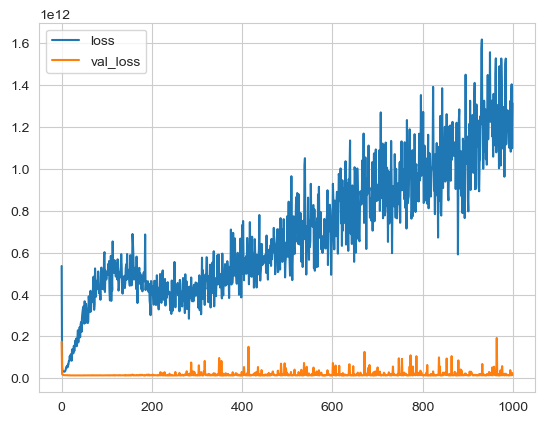

In [146]:
losses.plot()

In [147]:
predictions = model.predict(X_test_scaled)

222/222 [==============================] - 0s 1ms/step


In [148]:
predictions

array([[ 707907.6 ],
       [1069160.4 ],
       [ 665687.7 ],
       ...,
       [ 715876.25],
       [1370166.8 ],
       [ 908857.8 ]], dtype=float32)

In [149]:
MAE = mean_absolute_error(y_test,predictions)

In [150]:
# Check how much variance is explained by the actual model.
EVS = explained_variance_score(y_test,predictions)

In [151]:
r_sqrd = r2_score(y_test,predictions)

In [152]:
r_sqrd 

0.7119086390027909

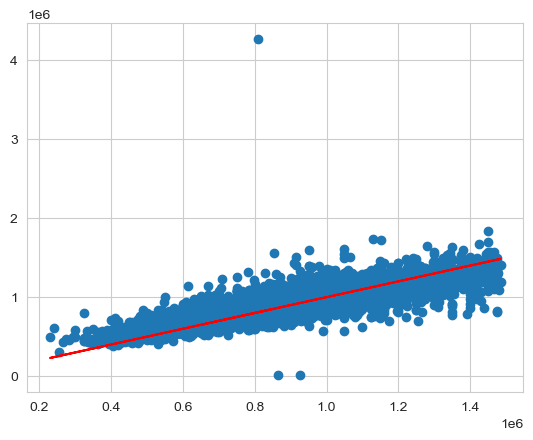

In [153]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [154]:
# Drop the sold price column and grap the first row house for testing as if totally unknown house is given to the model and 
# and see if the model can predict a price for it

single_house = df.drop('Sold_Price',axis=1).iloc[0]

In [155]:
single_house.shape

(34,)

In [156]:
single_house = scaler.transform(single_house.values.reshape(-1, 34))

In [157]:
Test_result = model.predict(single_house)

1/1 [==============================] - 0s 20ms/step


In [158]:
# Convert to one dimensinal array

Test_Result = Test_result.flatten()

In [159]:
true_value = cleaned_df['Sold_Price'][0]

In [160]:
report4 = {'Training_Method': ['Dropout'], 'EVS':EVS , 'r_squared' : r_sqrd, 'MAE':MAE, \
           'True_price':true_value, 'Test_result':Test_Result}

In [161]:
report4_df = pd.DataFrame(report4)

In [162]:
report4_df

,Training_Method,EVS,r_squared,MAE,True_price,Test_result
0,Dropout,0.732209,0.711909,87492.955359,1252430.0,1060297.375


# Create a Final Report

In [163]:
Report_df = pd.concat([report_df1,report_df2,report3_df,report4_df], axis = 0)

In [164]:
Report_df

,Training_Method,EVS,r_squared,MAE,True_price,Test_result
0,Normal,0.982505,0.982461,14447.214091,1252430.0,1215232.750
0,Early_Stopping,0.984592,0.984590,6626.082342,1252430.0,1252577.875
0,Dropout_EarlyStopping,0.738873,0.716597,85920.974953,1252430.0,980880.250
0,Dropout,0.732209,0.711909,87492.955359,1252430.0,1060297.375
